# iForest

In [1]:
import warnings
warnings.filterwarnings('ignore')

## General libraries

In [2]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from os.path import join
import json
import datetime

import time

### Load enviroment variables

In [3]:
from dotenv import load_dotenv
load_dotenv('../.env')

code_root = os.environ['CODE_ROOT']
cfg_path = os.environ['CFG_PATH']
data_root = os.environ['DATA_ROOT']

sys.path.insert(0, code_root)

### Specific libraries

In [4]:
from src.load.functions import get_fs_dataset
from src.plots.functions import plots_metrics, process_and_plot

### Parameters

Plot saved to /Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/arrhythmia_metrics_plot.png
Plot saved to /Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/cardio_metrics_plot.png
Plot saved to /Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/bank_metrics_plot.png
Plot saved to /Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/creditcard_metrics_plot.png
Plot saved to /Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/mammography_metrics_plot.png
Plot saved to /Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/musk_metrics_plot.png


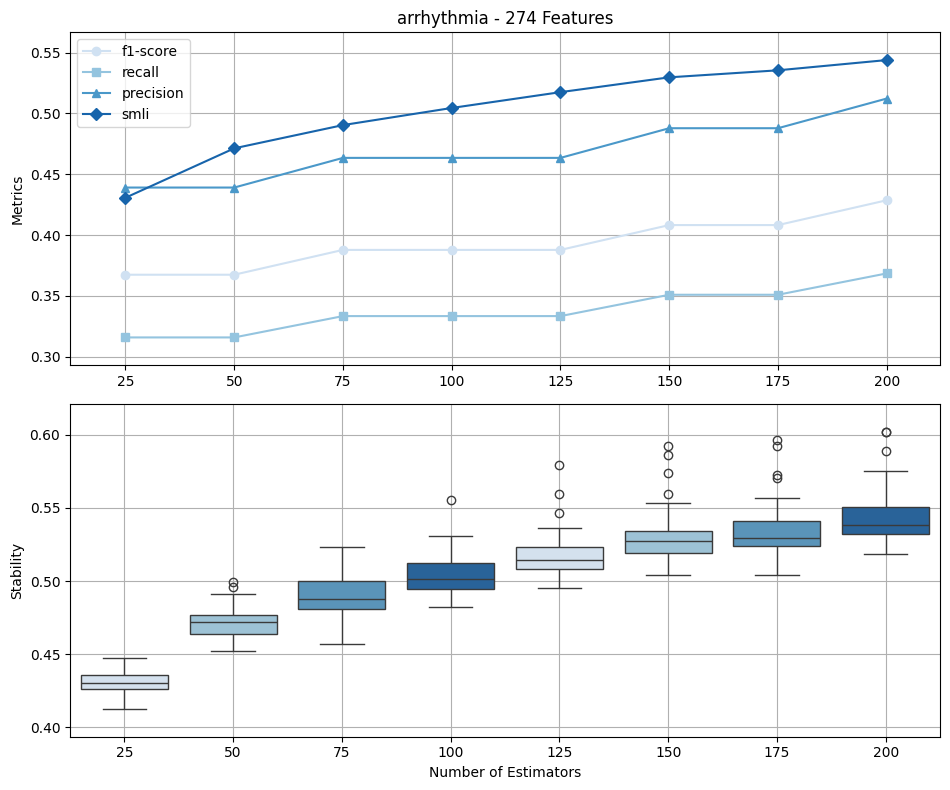

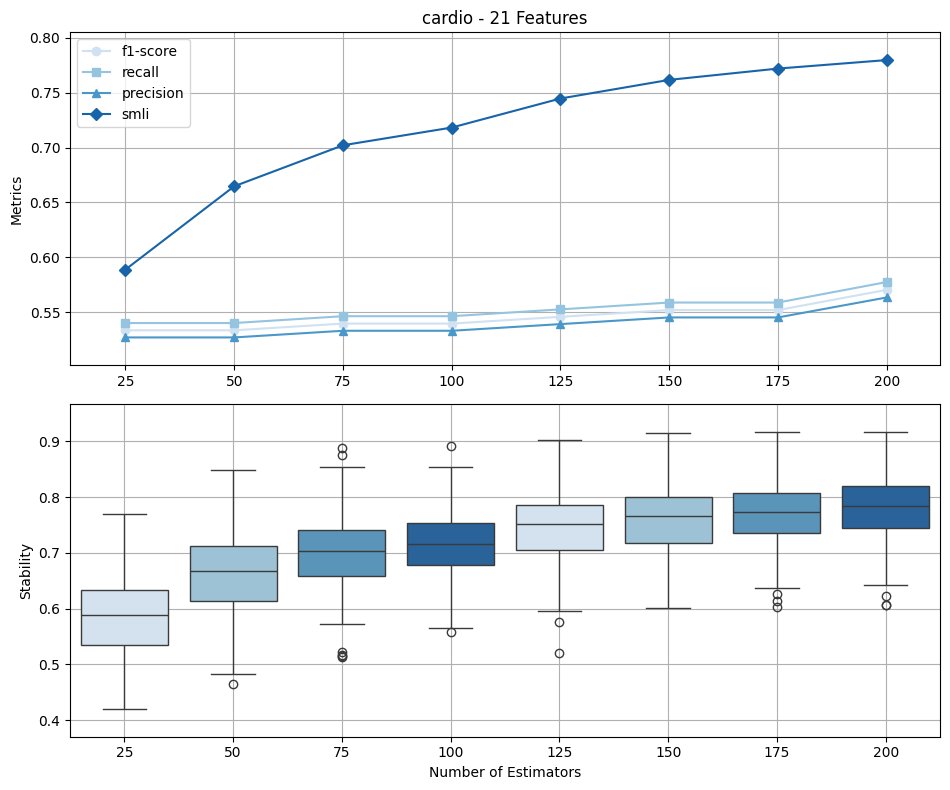

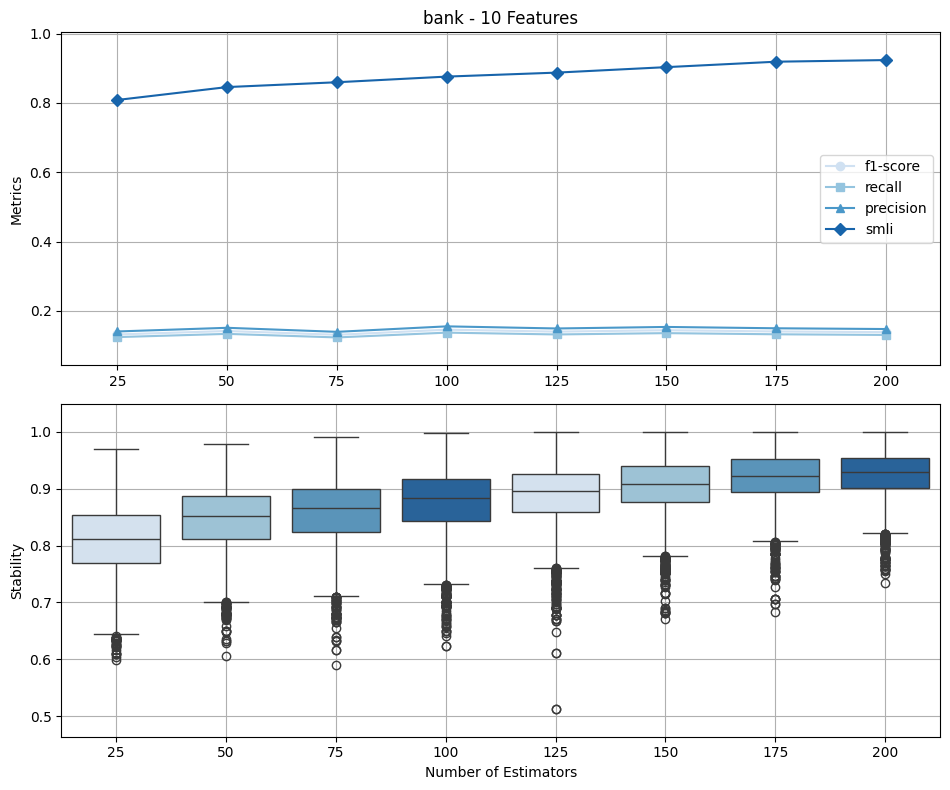

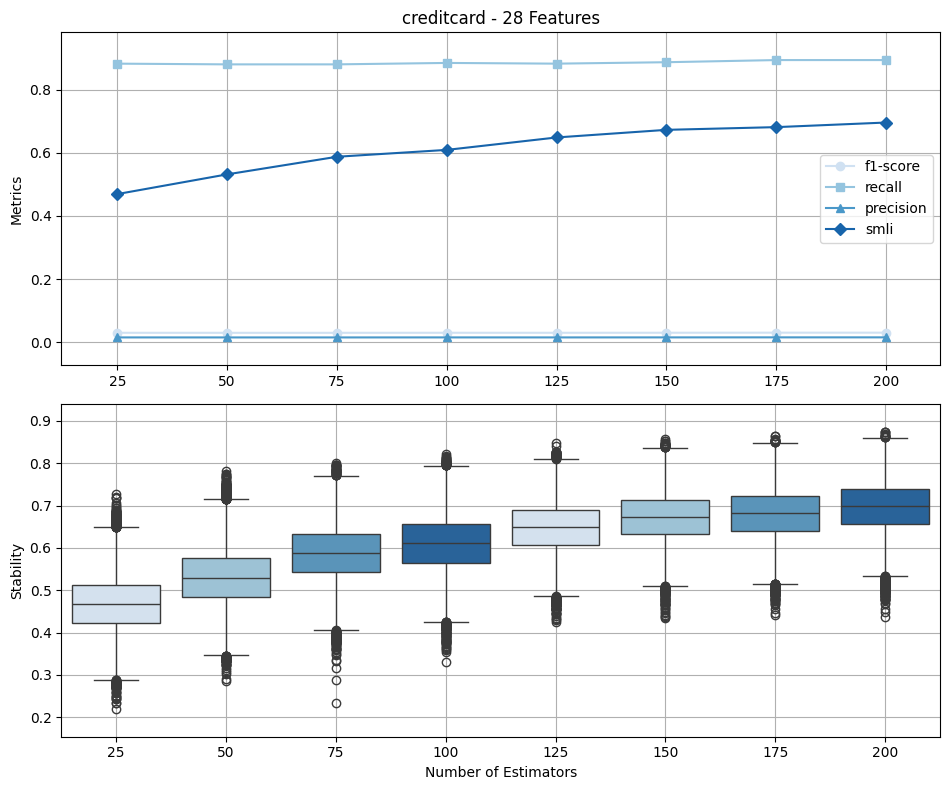

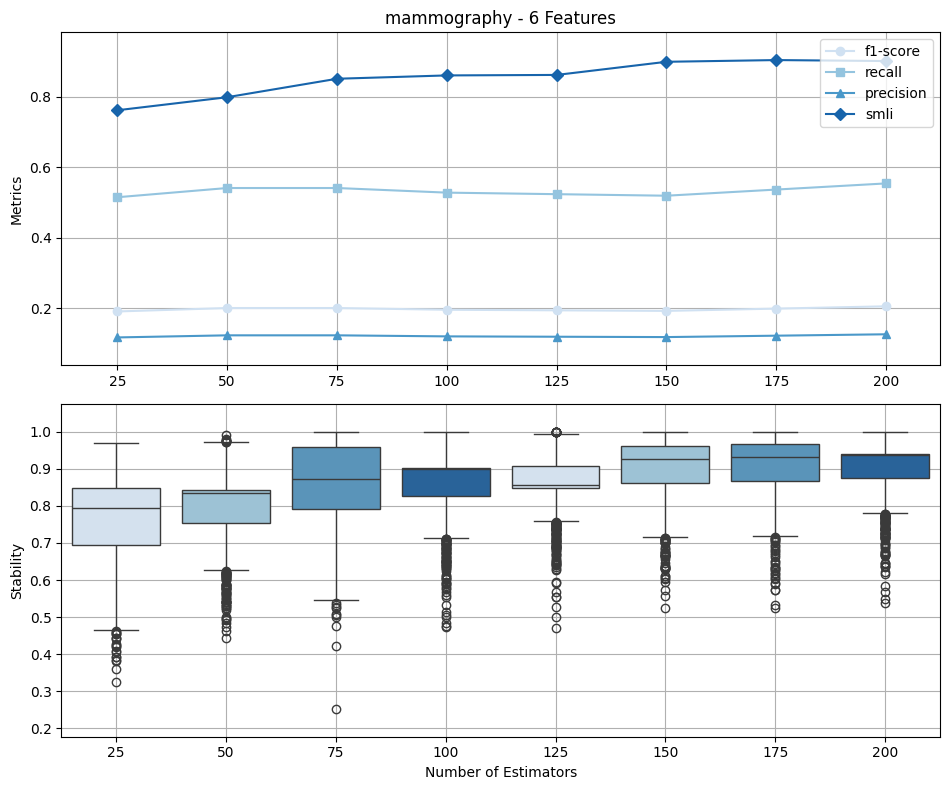

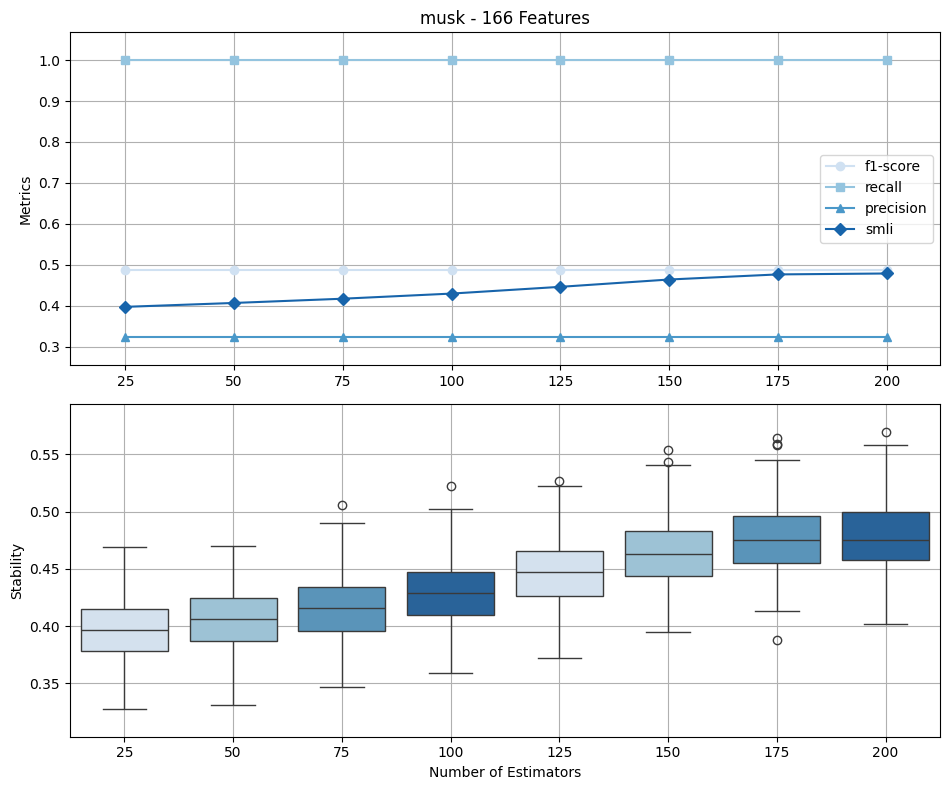

In [5]:
# Main script
seed = 123
np.random.seed(seed)

# List of dataset IDs to iterate over
dataset_ids = ['arrhythmia', 'cardio', 'bank', 'creditcard', 'mammography', 'musk']  # Add more dataset IDs as needed

# Parameters to pass
feat_imp = [100]
metrics_list = ['f1-score', 'recall', 'precision', 'smli', 'smli_all']
metrics_merge_list = ['f1-score', 'precision', 'recall', 'smli']

# Set to True to save plots, False to just show them
save_plots = True
save_directory = '/Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots'

# Create the directory if it doesn't exist
if save_plots and not os.path.exists(save_directory):
    os.makedirs(xsave_directory)

# Iterate over each dataset ID and plot metrics
for dataset_id in dataset_ids:
    # Plot metrics
    process_and_plot(
        dataset_id=dataset_id,
        data_root=data_root,
        feat_imp=feat_imp,
        metrics_list=metrics_list,
        metrics_merge_list=metrics_merge_list,
        x_axis_start=12.25,  # Adjust as needed
        x_axis_end=212.25,    # Adjust as needed
        save_plot=save_plots,  # Pass the save option
        save_dir=save_directory  # Pass the directory to save plots
    )


In [6]:
from PIL import Image
import os

# Specify the directory where your images are located
image_directory = save_directory

# List of your image file names (without the directory path)
image_files = [f"{dataset_id}_metrics_plot.png" for dataset_id in dataset_ids]

# Combine the directory path with each image file name
image_paths = [os.path.join(image_directory, img) for img in image_files]

# Open all images and find their sizes
images = [Image.open(img) for img in image_paths]
widths, heights = zip(*(img.size for img in images))

# Assuming all images have the same size
single_width = widths[0]
single_height = heights[0]

# Create a new image with the appropriate size
total_width = single_width * 2  # 2 columns
total_height = single_height * 3  # 3 rows
new_image = Image.new('RGB', (total_width, total_height))

# Paste the images into the new image
for index, img in enumerate(images):
    x_offset = (index % 2) * single_width  # Column position
    y_offset = (index // 2) * single_height  # Row position
    new_image.paste(img, (x_offset, y_offset))

# Save the combined image
output_path = os.path.join(image_directory, 'comparison.png')
new_image.save(output_path)

# Optionally, display the combined image
new_image.show()

In [7]:
path = os.path.join(data_root, 'outputs', 'resume.pq')

df = pd.read_parquet(path)

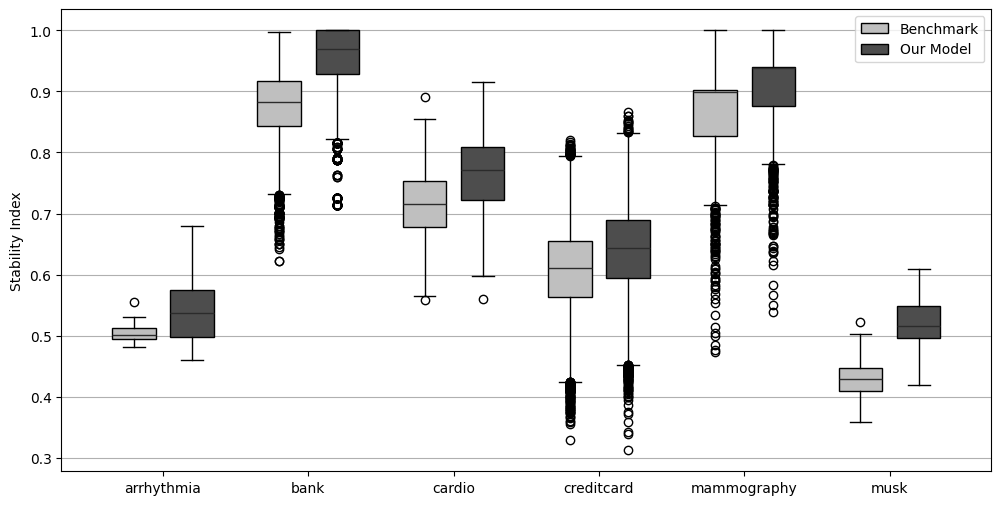

In [8]:
import matplotlib.pyplot as plt

# Create the plot using `smli_all` data
plt.figure(figsize=(12, 6))

datasets = df['dataset_id'].unique()

# Define grayscale colors
benchmark_color = "#bfbfbf"  # light grey for benchmark
our_model_color = "#4d4d4d"  # dark grey for our model
median_color = "#2b2b2b"  # dark grey for median line

for dataset in datasets:
    benchmark_data = df[(df['dataset_id'] == dataset) & (df['hpo'] == 'Benchmark')]['smli_all'].values[0]
    our_model_data = df[(df['dataset_id'] == dataset) & (df['hpo'] == 'Our model')]['smli_all'].values[0]
    
    plt.boxplot(benchmark_data, positions=[datasets.tolist().index(dataset) - 0.2], widths=0.3, 
                patch_artist=True, boxprops=dict(facecolor=benchmark_color), 
                medianprops=dict(color=median_color), showfliers=True)
    plt.boxplot(our_model_data, positions=[datasets.tolist().index(dataset) + 0.2], widths=0.3, 
                patch_artist=True, boxprops=dict(facecolor=our_model_color), 
                medianprops=dict(color=median_color), showfliers=True)

# Customize the plot
plt.xticks(range(len(datasets)), datasets, rotation=0)  # Set rotation to 0 for horizontal text
plt.ylabel('Stability Index')
plt.legend(["Benchmark", "Our Model"], loc='upper right')
plt.grid(axis='y')

# Specify the path where you want to save the plot
save_path = '/Users/eduardosepulveda/workspace_github/ad_shap_stability/test/data/plots/boxplots.png'

# Save the plot
plt.savefig(save_path, bbox_inches='tight')

# Display the plot
plt.show()